
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd

In [2]:
path = '../data/bank.csv'
bank_df = pd.read_csv(path)
bank_df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


## 1(a): EDA

In [3]:
# shape
print(bank_df.shape)

(4119, 21)


In [4]:
# columns
print(bank_df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
# data types
print(bank_df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


In [6]:
# any nulls
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# look at values
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
# pick up the numeric columns
bank_df_numeric = bank_df.select_dtypes(include=['float64', 'int'])
bank_df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0


In [9]:
# create correlation matrix
cor_matrix = bank_df_numeric.corr()
cor_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241


In [10]:
#%pip install matplotlib
#%pip install seaborn

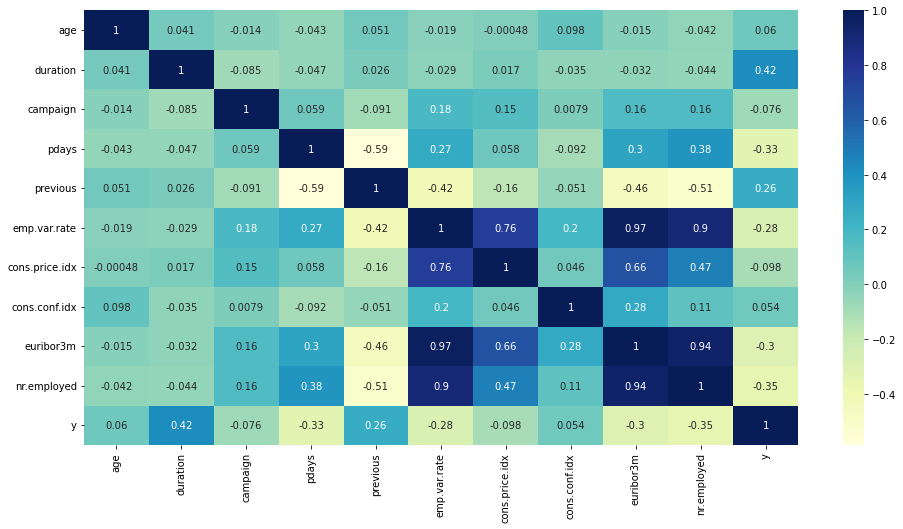

In [11]:
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(cor_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [12]:
#remove the result column
#bank_df_numeric = bank_df_numeric.drop(['y'], axis=1, errors='ignore')


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [13]:
#Attempt 1: list of features chosen
features = ['age', 'job', 'marital', 'education',
       'contact', 'day_of_week', 'duration', 'previous', 'y']

In [14]:
# check the quality of data for each of the features chosen

for feature in features:
    if feature != 'age':
        print("*" * 45)
        print(bank_df[feature].value_counts())

*********************************************
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
*********************************************
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
*********************************************
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
*********************************************
cellular     2652
telephone    1467
Name: contact, dtype: int64
*********************************************
thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_

In [15]:
# lets drop the unknow values
clean_bank_df = bank_df[features]

print(clean_bank_df.shape)

#1. remove unknowns from job
clean_bank_df = clean_bank_df.loc[clean_bank_df["job"] != 'unknown']
print(clean_bank_df.shape)

#2. remove unknowns from marital
clean_bank_df = clean_bank_df.loc[clean_bank_df["marital"] != 'unknown']
print(clean_bank_df.shape)

#3. remove unknowns from education
clean_bank_df = clean_bank_df.loc[clean_bank_df["education"] != 'unknown']
print(clean_bank_df.shape)


(4119, 9)
(4080, 9)
(4069, 9)
(3915, 9)


In [16]:
# check for quality again
# check the quality of data for each of the features chosen

for feature in features:
    if feature != 'age':
        print("*" * 45)
        print(clean_bank_df[feature].value_counts())

*********************************************
admin.           985
blue-collar      841
technician       671
services         380
management       309
retired          158
self-employed    154
entrepreneur     141
housemaid        107
unemployed       107
student           62
Name: job, dtype: int64
*********************************************
married     2398
single      1090
divorced     427
Name: marital, dtype: int64
*********************************************
university.degree      1256
high.school             912
basic.9y                568
professional.course     533
basic.4y                418
basic.6y                227
illiterate                1
Name: education, dtype: int64
*********************************************
cellular     2531
telephone    1384
Name: contact, dtype: int64
*********************************************
mon    818
thu    815
tue    791
wed    758
fri    733
Name: day_of_week, dtype: int64
*********************************************
77      24
11

In [17]:
# change the object cloumns to dummies
print(clean_bank_df.head())
print("*" * 45)
print(clean_bank_df.dtypes)
print("*" * 45)

# dummies is supposed to automatically ignore numeric columns
clean_bank_df = pd.get_dummies(clean_bank_df[['age', 'job', 'marital', 'education',
       'contact', 'day_of_week', 'duration', 'previous', 'y']], drop_first = True)
print(clean_bank_df.head())
print("*" * 45)

   age          job  marital          education    contact day_of_week  \
0   30  blue-collar  married           basic.9y   cellular         fri   
1   39     services   single        high.school  telephone         fri   
2   25     services  married        high.school  telephone         wed   
3   38     services  married           basic.9y  telephone         fri   
4   47       admin.  married  university.degree   cellular         mon   

   duration  previous  y  
0       487         0  0  
1       346         0  0  
2       227         0  0  
3        17         0  0  
4        58         0  0  
*********************************************
age             int64
job            object
marital        object
education      object
contact        object
day_of_week    object
duration        int64
previous        int64
y               int64
dtype: object
*********************************************
   age  duration  previous  y  job_blue-collar  job_entrepreneur  \
0   30       487     

In [18]:
print(clean_bank_df.dtypes)

age                              int64
duration                         int64
previous                         int64
y                                int64
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_housemaid                    uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student                      uint8
job_technician                   uint8
job_unemployed                   uint8
marital_married                  uint8
marital_single                   uint8
education_basic.6y               uint8
education_basic.9y               uint8
education_high.school            uint8
education_illiterate             uint8
education_professional.course    uint8
education_university.degree      uint8
contact_telephone                uint8
day_of_week_mon                  uint8
day_of_week_thu                  uint8
day_of_week_tue          


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [19]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  

In [20]:
# set the model
LogRegModel1 = LogisticRegression(max_iter=550) 
# simple model, no hyper parameters, but need to increase iterations due to error

# set x and y
X1 = clean_bank_df.drop('y', axis =1)
y1 = clean_bank_df['y']

# train test 
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =22)

# fit model
LogRegModel1.fit(x_train1, y_train1)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=550)

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



In [21]:
name = clean_bank_df.columns.drop('y')

coef = LogRegModel1.coef_[0]

coef_df = pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()
coef_df.set_index('Name', inplace=True)
coef_df.sort_values('Coef', ascending=False)

,Coef
Name,
previous,1.013171
job_unemployed,0.978898
job_student,0.828081
job_housemaid,0.534841
education_university.degree,0.410112
education_basic.6y,0.345979
job_retired,0.31922
education_professional.course,0.299848
job_technician,0.29691


**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

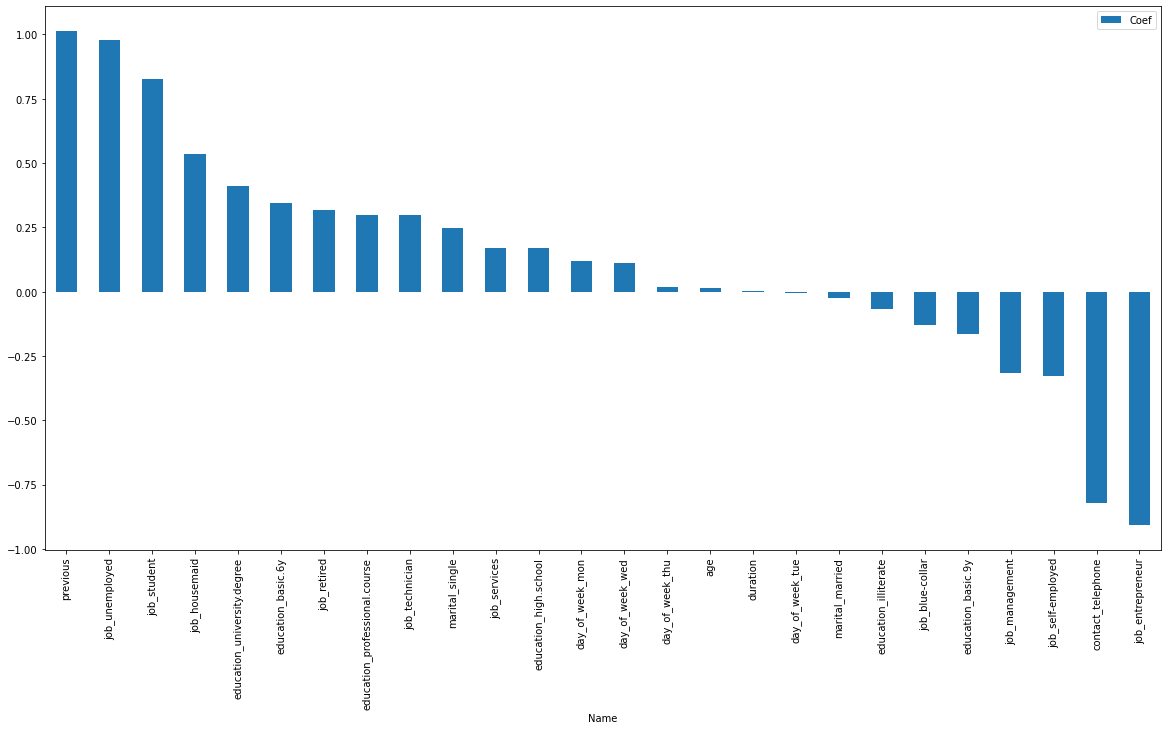

In [22]:
# display the coefficients as a bar chart
coef_df.sort_values('Coef', ascending=False).plot(kind='bar', figsize=(20,10));

In [23]:
# predict with model
y_pred = LogRegModel1.predict(x_test1)

In [24]:
# check accuracy score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, log_loss
print(f'Accuracy: {accuracy_score(y_test1,y_pred)}')


Accuracy: 0.9090909090909091


In [25]:
# check other scores
print(f'Confusion Matrix:\n {confusion_matrix(y_test1,y_pred)}')
print("*" * 45)
print(f'ROC-AUC Score: {roc_auc_score(y_test1,y_pred)}')
print("*" * 45)
print(f'Log Loss: {log_loss(y_test1,y_pred)}')

Confusion Matrix:
 [[861  12]
 [ 77  29]]
*********************************************
ROC-AUC Score: 0.6299196005965118
*********************************************
Log Loss: 3.13989856416365


#### Adjusting probablity threshold

In [27]:
y_pred_prob = LogRegModel1.predict_proba(x_test1)
y_pred_prob

array([[0.98713675, 0.01286325],
       [0.93807095, 0.06192905],
       [0.98408516, 0.01591484],
       ...,
       [0.89755175, 0.10244825],
       [0.823578  , 0.176422  ],
       [0.51486542, 0.48513458]])

#### Visualize distribution of probabilities

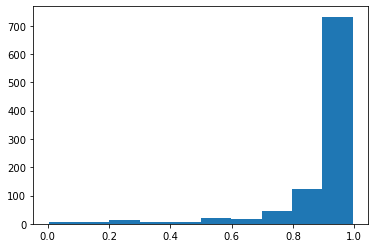

(array([732., 123.,  45.,  17.,  22.,   6.,   7.,  15.,   7.,   5.]),
 array([0.00414651, 0.10345116, 0.20275581, 0.30206046, 0.40136512,
        0.50066977, 0.59997442, 0.69927907, 0.79858373, 0.89788838,
        0.99719303]),
 <BarContainer object of 10 artists>)

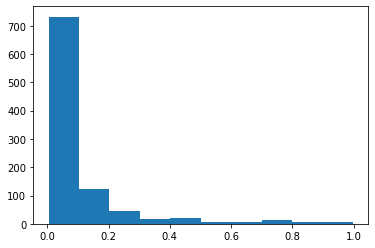

In [28]:
y_pred_prob_t = y_pred_prob.transpose()

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_prob_t[0])
plt.show()
plt.hist(y_pred_prob_t[1])

#### more the threshold to 20% and try predicting again

In [29]:
y_pred_20_percent=[]
for prob in y_pred_prob_t[1]:
    if prob > .20:
        y_pred_20_percent.append(1)
    else:
        y_pred_20_percent.append(0)
        
print(len(y_pred_20_percent))
print(len(y_test1))

979
979


In [31]:
#see the predictions count
y_pred_20_percent.count(1) 

126

#### check accuracy once more

In [34]:
print(f'Accuracy: {accuracy_score(y_test1,y_pred_20_percent)}')
print("*" * 45)
print(f'Confusion Matrix:\n {confusion_matrix(y_test1,y_pred_20_percent)}')
print("*" * 45)
print(f'ROC-AUC Score: {roc_auc_score(y_test1,y_pred_20_percent)}')
print("*" * 45)
print(f'Log Loss: {log_loss(y_test1,y_pred_20_percent)}')

Accuracy: 0.8896833503575077
*********************************************
Confusion Matrix:
 [[809  64]
 [ 44  62]]
*********************************************
ROC-AUC Score: 0.7557976182757354
*********************************************
Log Loss: 3.8102543665841537


In [36]:
# pickle the model
import pickle
filename = open('bank_marketing_logistic_model.pkl', 'wb')
pickle.dump(LogRegModel1, filename)
filename.close()

## Bonus: Use Regularization to optimize your model.

In [35]:
# try using a for loop to test various regularization strengths 'C'